In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#import seaborn as sns

In [2]:
data_rebalanced = pd.read_csv('AZPS_NG_&_avgCI_Rebalanced_10.csv')
data_original = pd.read_csv('DataCenter_elect_Total_ITE_DRLagent_AZ_hourly.csv')
data_original

,datetime,year,month,day,hour,Total_energy
0,2020-01-01 00:00:00,2020,1,1,0,344.372090
1,2020-01-01 01:00:00,2020,1,1,1,346.072810
2,2020-01-01 02:00:00,2020,1,1,2,351.583070
3,2020-01-01 03:00:00,2020,1,1,3,357.321134
4,2020-01-01 04:00:00,2020,1,1,4,361.139436
...,...,...,...,...,...,...
8755,2020-12-31 19:00:00,2020,12,31,19,406.118520
8756,2020-12-31 20:00:00,2020,12,31,20,425.452500
8757,2020-12-31 21:00:00,2020,12,31,21,419.559204
8758,2020-12-31 22:00:00,2020,12,31,22,427.370190


In [3]:
data_rebalanced

,timestamp,WND,SUN,WAT,OIL,NG,COL,NUC,OTH,avg_CI,Rebalanced_Energy
0,2022-01-01 00:00:00+00:00,149.0,81.0,0.0,0.0,731.0,1361.0,0,31.0,631.661708,309.934881
1,2022-01-01 01:00:00+00:00,137.0,67.0,0.0,0.0,1003.0,1399.0,0,30.0,625.874052,311.465529
2,2022-01-01 02:00:00+00:00,141.0,68.0,0.0,0.0,1028.0,1403.0,0,29.0,623.899963,1000.000000
3,2022-01-01 03:00:00+00:00,141.0,71.0,0.0,0.0,954.0,1405.0,0,30.0,627.036524,321.589021
4,2022-01-01 04:00:00+00:00,153.0,54.0,0.0,0.0,672.0,1401.0,0,31.0,644.364777,325.025492
...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00+00:00,181.0,350.0,0.0,0.0,989.0,1338.0,0,28.0,555.977477,614.922042
8756,2022-12-31 20:00:00+00:00,180.0,346.0,0.0,0.0,995.0,1338.0,0,27.0,556.855856,382.907250
8757,2022-12-31 21:00:00+00:00,185.0,332.0,0.0,0.0,1110.0,1336.0,0,28.0,555.502173,377.603284
8758,2022-12-31 22:00:00+00:00,187.0,240.0,0.0,0.0,1145.0,1337.0,0,28.0,570.557371,384.633171


NameError: name 'sns' is not defined

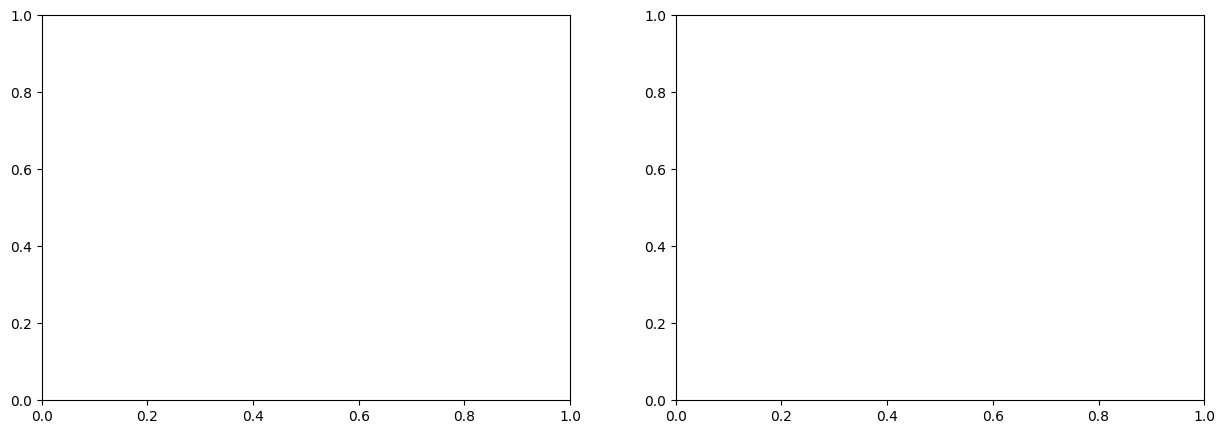

In [4]:
from scipy.interpolate import make_interp_spline
ranges = [48,96]
fig, axs = plt.subplots(1,2,figsize=(15, 5))
nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced['Rebalanced_Energy'].values))
avg_ci_rebalanced = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]/max(data_rebalanced['avg_CI'].values)
energy_rebalanced = data_rebalanced['Rebalanced_Energy'].values[ranges[0]:ranges[1]]/nor_value
energy_original = data_original['Total_energy'].values[ranges[0]:ranges[1]]/nor_value
x_values = np.arange(48)
X_Y_Spline_re = make_interp_spline(x_values, energy_rebalanced)
X_Y_Spline_or = make_interp_spline(x_values, energy_original)

X_ = np.linspace(x_values.min(), x_values.max(), 40)
Y_re = X_Y_Spline_re(X_)
Y_or = X_Y_Spline_or(X_)

sns.set_style('darkgrid')
axs[1].set_title("Shifted Load", fontdict = { 'fontsize': 20})
axs[1].plot(avg_ci_rebalanced, label = 'Carbon Intensity')
axs[1].fill_between(x_values, avg_ci_rebalanced, color='blue', alpha=0.2)
axs[1].plot(X_, Y_re, label = 'Energy Consumption')
axs[1].set_xticks([])
axs[0].set_title("Original Load", fontdict = { 'fontsize': 20})
axs[0].plot(avg_ci_rebalanced, label = 'Carbon Intensity')
axs[0].fill_between(x_values, avg_ci_rebalanced, color='blue', alpha=0.2)
axs[0].plot(X_, Y_or, label = 'Energy Consumption')
axs[0].set_xticks([])
plt.legend(loc='lower left')

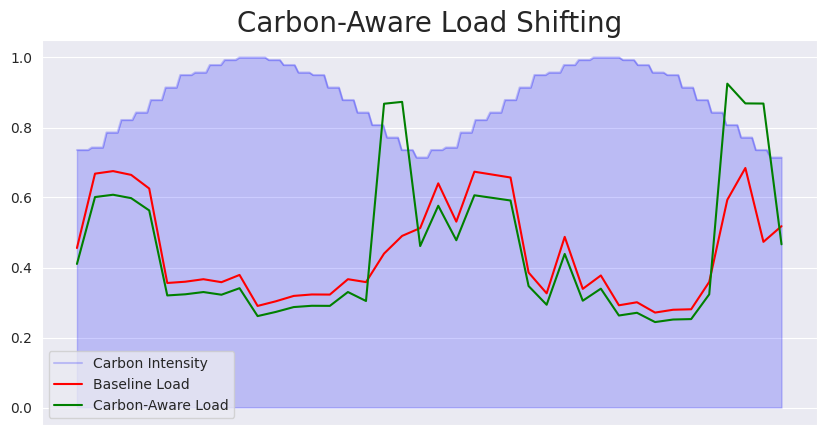

In [14]:
from scipy.interpolate import make_interp_spline
ranges = [48,240]
fig, axs = plt.subplots(1,figsize=(10, 5))
data_rebalanced_energy = np.load('shifted_load_az_price.npy')
data_load = np.load('price_4.npy')
#nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced['Rebalanced_Energy'].values))
nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced_energy))
avg_ci_rebalanced = data_load[ranges[0]:ranges[1]]/max(data_load)
#energy_rebalanced = data_rebalanced['Rebalanced_Energy'].values[ranges[0]:ranges[1]]/nor_value
energy_rebalanced = data_rebalanced_energy[ranges[0]:ranges[1]]/nor_value 
energy_original = data_original['Total_energy'].values[ranges[0]:ranges[1]]/nor_value
x_values = np.arange(192)
X_Y_Spline_re = make_interp_spline(x_values, energy_rebalanced)
X_Y_Spline_or = make_interp_spline(x_values, energy_original)

X_ = np.linspace(x_values.min(), x_values.max(), 40)
Y_re = X_Y_Spline_re(X_)
Y_or = X_Y_Spline_or(X_)

sns.set_style('darkgrid')
axs.set_title("Carbon-Aware Load Shifting", fontdict = { 'fontsize': 20})
axs.plot(avg_ci_rebalanced, label = 'Carbon Intensity',color='blue', alpha=0.2)
axs.plot(X_, Y_or, label = 'Baseline Load',color='red')
axs.plot(X_, Y_re, label = 'Carbon-Aware Load',color='green')
axs.fill_between(x_values, avg_ci_rebalanced, color='blue', alpha=0.2)
axs.set_xticks([])
plt.legend(loc='lower left')

In [5]:
from scipy.interpolate import make_interp_spline
from matplotlib import cm
from matplotlib import dates
from datetime import datetime
import seaborn as sns
sns.set_style('whitegrid')
ranges = [48,96]
fig, axs = plt.subplots(1,figsize=(10, 5))
#define size of the graph
xl = 0
xh = 
yl = 0
yh = 1.1
#array for gradient creation
arr = [[1, 1], [0, 0]]

#plot a gradient picture first in the desired size, which will also autoscale the graph
#set interpolation to "nearest" to see the underlying grid structure
im1 = plt.imshow(arr,  cmap = cm.Greys, extent = [xl, xh, yl, yh], interpolation = "bicubic", alpha = .5, aspect = "auto")
#data_rebalanced = np.load('shifted_load_az_price.npy')
nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced['Rebalanced_Energy'].values))
#nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced))
avg_ci_rebalanced = (data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]-min(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]))/(max(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]])-min(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]))
energy_rebalanced = data_rebalanced['Rebalanced_Energy'].values[ranges[0]:ranges[1]]/(nor_value*1.05)
#energy_rebalanced = data_rebalanced[ranges[0]:ranges[1]]/nor_value 
energy_original = data_original['Total_energy'].values[ranges[0]:ranges[1]]/nor_value
x_values = np.arange(48)
X_Y_Spline_re = make_interp_spline(x_values, energy_rebalanced)
X_Y_Spline_or = make_interp_spline(x_values, energy_original)

X_ = np.linspace(x_values.min(), x_values.max(), 500)
Y_re = X_Y_Spline_re(X_)
Y_or = X_Y_Spline_or(X_)

axs.set_xlim([x_values[0], x_values[-1]])
axs.set_xlim([0, 1])
axs.tick_params(axis='both', labelsize=12)
axs.set_title("Carbon-Aware Load Shifting", fontdict = { 'fontsize': 16})
axs.plot(avg_ci_rebalanced, label = 'Carbon Intensity',color='grey', alpha=1)
axs.plot(X_, Y_or, label = 'Baseline Load',color='tab:red',linewidth=2)
axs.plot(X_, Y_re, label = 'Carbon-Aware Load',color='green',linewidth=2)
axs.fill_between(x_values, avg_ci_rebalanced, 1.1, color='white',alpha=1,zorder=0)
axs.grid(True, color='grey', linestyle='--', linewidth=1,zorder=10)
#axs.fill_between(x_values, avg_ci_rebalanced, color='blue', alpha=0.2)
x = ['0:00','12:00','0:00','12:00','0:00']
axs.set_xticks([0,11,23,35,47], x)
axs.set_xlabel('Hour', fontsize=14) # add label to x-axis
axs.set_ylabel('Normalized Values', fontsize=14) # add label to y-axis

plt.legend(loc='lower left')

SyntaxError: invalid syntax (1355657674.py, line 11)

/tmp/ipykernel_1804604/321677641.py:72: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x7f4d4efee3e0> starts with '_'. It is thus excluded from the legend.
  leg = axs.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=11)


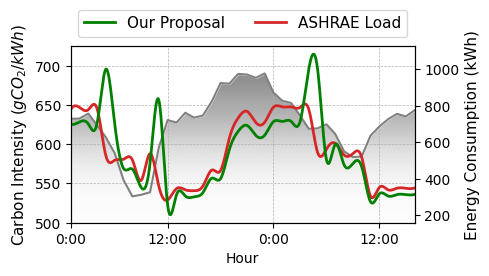

In [17]:
from scipy.interpolate import make_interp_spline
from matplotlib import cm
from matplotlib import dates
from datetime import datetime

ini = 80+30
le = 40
ranges = [ini,ini+le]
fig, axs = plt.subplots(1, figsize=(5, 3))

#define size of the graph
xl = 0
xh = 39
yl = 500
yh1 = 725
yh2 = 1.1

#array for gradient creation
arr = [[1, 1], [0, 0]]

#plot a gradient picture first in the desired size, which will also autoscale the graph
#set interpolation to "nearest" to see the underlying grid structure
im1 = plt.imshow(arr,  cmap = cm.Greys, extent = [xl, xh, yl, yh1], interpolation = "bicubic", alpha = .5, aspect = "auto")

#data_rebalanced = np.load('shifted_load_az_price.npy')
nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced['Rebalanced_Energy'].values))

#avg_ci_rebalanced = (data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]-min(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]))/(max(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]])-min(data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]))
avg_ci_rebalanced = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]
Y_re = data_rebalanced['Rebalanced_Energy'].values[ranges[0]:ranges[1]]
Y_or = data_original['Total_energy'].values[ranges[0]:ranges[1]]

x_values = np.arange(40)
X_Y_Spline_re = make_interp_spline(x_values, Y_re)
X_Y_Spline_or = make_interp_spline(x_values, Y_or)

X_ = np.linspace(x_values.min(), x_values.max(), 500)
Y_re_spline = X_Y_Spline_re(X_)
Y_or_spline = X_Y_Spline_or(X_)

# axs.set_xlim([x_values[0], x_values[-1]])
axs.set_ylim([500, 725])

#axs.set_title("Carbon-Aware Load Shifting", fontdict={ 'fontsize': 16})

# Create two different y-axes
axs2 = axs.twinx()
#axs2.set_ylim([0, yh2])

line1, = axs.plot(avg_ci_rebalanced, color='grey', alpha=1)
line3, = axs2.plot(X_, Y_or_spline, label='ASHRAE Load', color='tab:red', linewidth=2)
line2, = axs2.plot(X_, Y_re_spline, label='Our Proposal', color='green', linewidth=2)

axs.fill_between(x_values, avg_ci_rebalanced, 725, color='white', alpha=1, zorder=0)
# axs.grid(True, color='grey', linestyle='--', linewidth=1, zorder=10)
axs.grid(True, which='both', linestyle='--', linewidth=0.5)
x = ['0:00','12:00','0:00','12:00']
axs.set_xticks([0,11,23,35], x)
axs.set_xlabel('Hour', fontsize=10) # add label to x-axis
axs2.grid(False)
# Add y-axis labels
axs.set_ylabel('Carbon Intensity ($gCO_2/kWh$)', fontsize=11)
axs2.set_ylabel('Energy Consumption (kWh)', fontsize=11)

axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=10)
axs2.tick_params(axis='y', labelsize=10)

handles = [line1, line2, line3]
labels = [handle.get_label() for handle in handles]
# Set the position of the legends outside the figure, on top
leg = axs.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=11)

plt.tight_layout()
# plt.savefig('carbon_ls.pdf')
# plt.tight_layout()

# Save as a PDF
plt.savefig("carbon_ls.pdf", format='pdf', bbox_inches='tight')
plt.show()


[-34.437209  -34.607281  648.41693   ... -41.9559204 -42.737019
 -43.8442404]


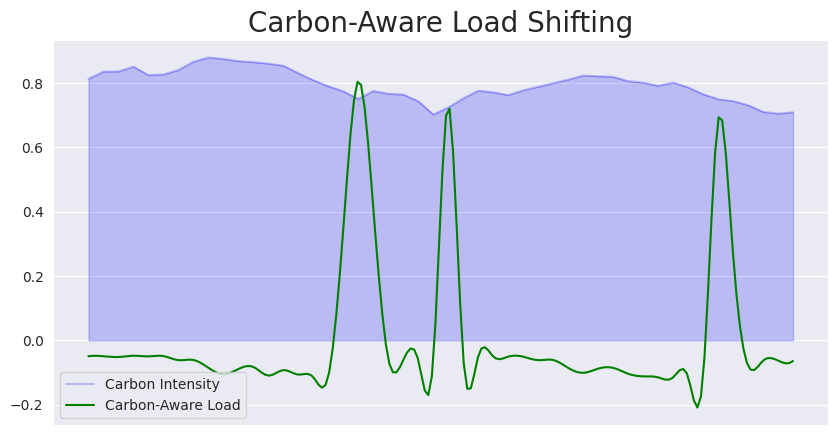

In [21]:
from scipy.interpolate import make_interp_spline
ranges = [48,96]
fig, axs = plt.subplots(1,figsize=(10, 5))
#data_rebalanced = np.load('shifted_load_az_price.npy')
data_diff = data_rebalanced['Rebalanced_Energy'].values-data_original['Total_energy'].values
nor_value = max(data_diff)
print(data_diff)
#nor_value = max(max(data_original['Total_energy'].values),max(data_rebalanced))
avg_ci_rebalanced = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]/max(data_rebalanced['avg_CI'].values)
energy_rebalanced = data_diff[ranges[0]:ranges[1]]/nor_value
#energy_rebalanced = data_rebalanced[ranges[0]:ranges[1]]/nor_value 
#energy_original = data_original['Total_energy'].values[ranges[0]:ranges[1]]/nor_value
x_values = np.arange(48)
X_Y_Spline_diff = make_interp_spline(x_values, energy_rebalanced)
#X_Y_Spline_or = make_interp_spline(x_values, energy_original)

X_ = np.linspace(x_values.min(), x_values.max(), 200)
Y_re = X_Y_Spline_diff(X_)
#Y_or = X_Y_Spline_or(X_)

sns.set_style('darkgrid')
axs.set_title("Carbon-Aware Load Shifting", fontdict = { 'fontsize': 20})
axs.plot(avg_ci_rebalanced, label = 'Carbon Intensity',color='blue', alpha=0.2)
#axs.plot(X_, Y_or, label = 'Baseline Load',color='red')
axs.plot(X_, Y_re, label = 'Carbon-Aware Load',color='green')
axs.fill_between(x_values, avg_ci_rebalanced, color='blue', alpha=0.2)
axs.set_xticks([])
plt.legend(loc='lower left')

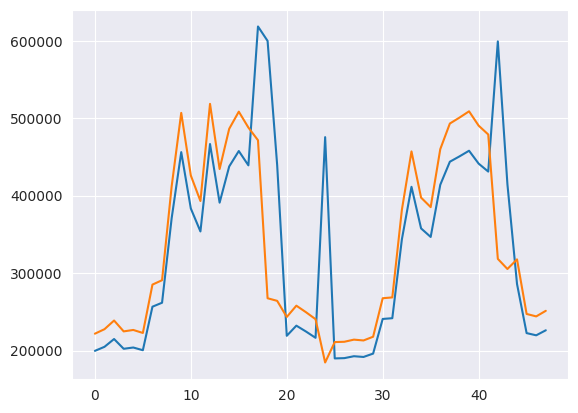

In [97]:
data_mul_re = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]*data_rebalanced['Rebalanced_Energy'].values[ranges[0]:ranges[1]]
data_mul_or = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]*data_original['Total_energy'].values[ranges[0]:ranges[1]]
plt.plot(data_mul)
plt.plot(data_mul_or)

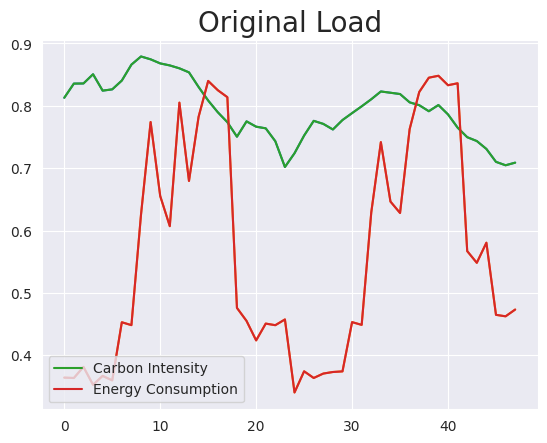

In [41]:
ranges = [48,96]
avg_ci_rebalanced = data_rebalanced['avg_CI'].values[ranges[0]:ranges[1]]/max(data_rebalanced['avg_CI'].values)
energy_rebalanced = data_original['Total_energy'].values[ranges[0]:ranges[1]]/max(data_original['Total_energy'].values)
plt.plot(avg_ci_rebalanced)
plt.plot(energy_rebalanced)
plt.title("Original Load", fontdict = { 'fontsize': 20})
plt.plot(avg_ci_rebalanced, label = 'Carbon Intensity')
plt.plot(energy_rebalanced, label = 'Energy Consumption')
plt.legend(loc='lower left')

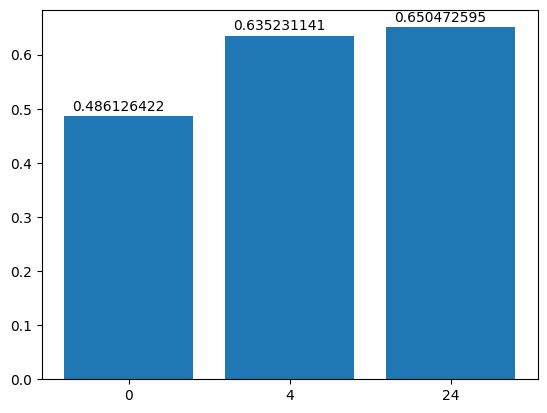

In [3]:
bar_data = [0.486126422,0.635231141,0.650472595]
plt.bar(['0','4','24'],bar_data)
xlocs=range(0,4)
for i, v in enumerate(bar_data):
    plt.text(xlocs[i] - 0.35, v + 0.01, str(v))

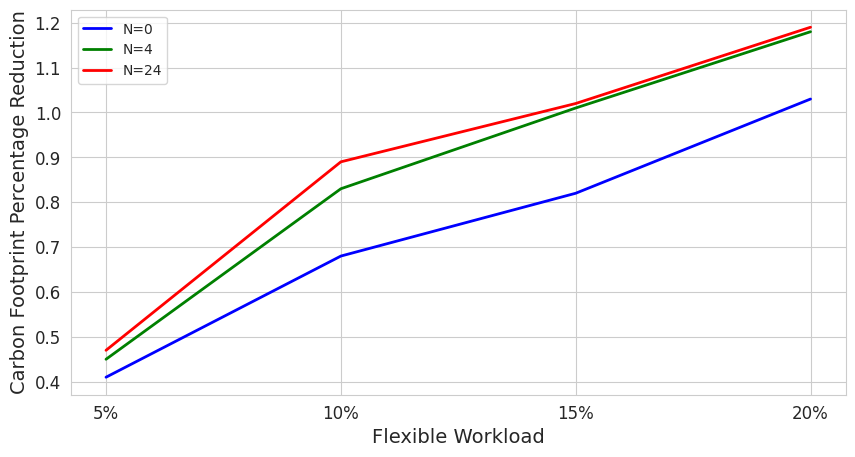

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
data_1 = [0.41,0.68,0.82,1.03]
data_4 = [0.45,0.83,1.01,1.18]
data_24 = [0.47,0.89,1.02,1.19]

fig, axs = plt.subplots(figsize=(10, 5))
#axs.grid(True, color='grey', linestyle='--', linewidth=1, zorder=10)
plt.plot(data_1,label='N=0', color='blue', linewidth=2)
plt.plot(data_4,label='N=4', color='green', linewidth=2)
plt.plot(data_24,label='N=24', color='red', linewidth=2)
axs.set_xticks([0,1,2,3],['5%','10%','15%','20%'])
axs.set_ylabel('Carbon Footprint Percentage Reduction', fontsize=14)
axs.set_xlabel('Flexible Workload', fontsize=14)
axs.tick_params(axis='both', labelsize=12)
#axs.patch.set_edgecolor('black')  
#axs.patch.set_linewidth('1')  
plt.legend()
plt.show()